<img src="https://www.dataiku.com/static/img/learn/guide/getting-started/getting-started-with-python/logo-stack-python.png" style="width: 700px;">
<h1 align=center style="color: #005496; font-size: 4.2em;">🐍 Machine Learning 🐍</h1>
<h2 align=center>Laboratory on Numpy / Matplotlib / Pandas / Scikit-learn</h2>

## Introduction

Python has become the de-facto standard programming language for data analytics in the past few years. Python's success is due to several factors, but one primary reason has been the availability of robust, open-source libraries for scientific computation, such as Numpy, Scipy and Matplotlib. Python is also the most popular programming language for machine learning, thanks to libraries such as Scikit-learn, TensorFlow and PyTorch.

This lecture will explore the basics of Numpy, Matplotlib and Scikit-learn. The first is a library for data manipulation through the powerful `numpy.ndarray` data structure; the second is helpful for graphical visualization and plotting; the third is a general-purpose library for machine learning, containing dozens of algorithms for classification, regression, clustering and others.

In this lecture, we assume familiarity with the Python programming language. If you are unfamiliar with the language, we advise you to look it up before going over to the next sections. Here are some useful links to learn about Python:
- https://docs.python.org/3/tutorial/introduction.html
- https://www.learnpython.org/
- http://www.scipy-lectures.org/

If you have never seen a page like this, it is a **Jupyter Notebook**. Here one can easily embed Python code and run it on the fly. You can run the code in a cell by selecting the cell and clicking the *Run* button (top). You can do the same using the **SHIFT+Enter** shortcut. You can modify the existing cells, run them, and save your changes.

## Requirements

1. Python (preferably version > 3.7): https://www.python.org/downloads/
2. Numpy, Scipy and Matplotlib: https://www.scipy.org/install.html
3. Scikit-learn: http://scikit-learn.org/stable/install.html
4. Pandas: https://pandas.pydata.org/docs/getting_started/index.html

## References

- https://docs.scipy.org/doc/numpy/
- https://docs.scipy.org/doc/scipy/reference/
- https://matplotlib.org/users/index.html
- http://scikit-learn.org/stable/documentation.html



In [37]:
# pip install matplotlib numpy pandas seaborn scikit-learn

We now define a couple of functions which will be useful to plot the decision function of a trained ML model

In [38]:
from utils.lib import plot_data
from utils.lib import plot_decision_surface
from utils.lib import plot_3D_decision_surface
from utils.lib import plot_svm_margin

In [39]:
# Disable warnings within the notebook
import warnings
warnings.filterwarnings('ignore')

# 📓 Scikit-learn: the Alpha and the Omega of ML coding 📓
Let's now dive into the real **Machine Learning** part. *Scikit-learn* is the most widespread library for Machine Learning in use nowadays, and most of its fame is due to its extreme simplicity. With Scikit-learn, it is possible to manage datasets easily and train a wide range of classifiers out-of-the-box. It is also helpful for several other Machine Learning tasks, such as regression, clustering, dimensionality reduction, and model selection.

# Lecture Summary

### 🔵 Supervised Learning
1. **Classification**
    1. SVM (Linear, Feature Mapping, Kernel)
    2. Decision Tree
2. **K-Fold Cross Validation**

### 🗂 Data, data, data

3. **Example**: Is your red wine of good quality??

### 🔴 Unsupervised Learning

4. **Clustering**
    1. K-means
5. **Dimensionality Reduction**
    1. PCA

# 🔵 Supervised Learning 

We will first generate a synthetic dataset which we will use for the experiments. We will restrict ourselves to a simple case, in which each example has 2-components.

$$
\mathbf{x} = \{ x_0, x_1\} \qquad x_0, x_1 \in \mathcal{N}(0,1) \qquad \mathbf{X} = \{\mathbf{x}_i\}^{N}_{i=0} \\[1.5ex]
$$
Then, we assume that each example $\mathbf{x}$ is part of the dataset if and only if it satisfies the following condition (remember that $x^2 +y^2 = r^2$ is the equation describing a circle centered at the origin).
$$
\mathbf{x} \in \mathbf{X} \quad \Leftrightarrow \quad (x_0^2 + x_1^2) > 1 \;\; \vee \;\; (x_0^2 + x_1^2) \leq 0.25 \\[1.5ex]
$$

Lastly, we need to classify these points. We assume that the classification function has the following form:

$$
y =
\begin{cases} 
1 \quad x_0^2 + x_1^2 > 1\\
0 \quad x_0^2 + x_1^2 \leq 0.25
\end{cases}$$

We can generate a dataset and plot the correspoding results.

## Generating a suitable dataset

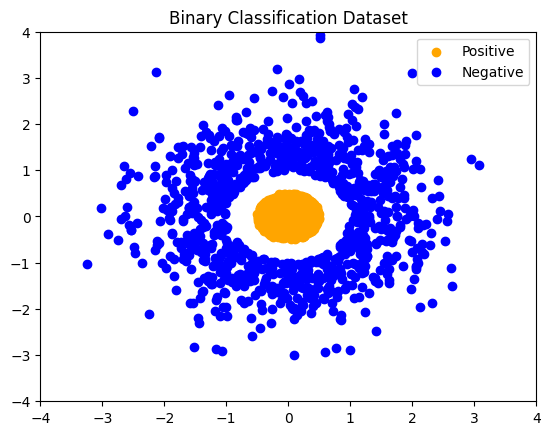

In [40]:
# Generate a synthetic dataset by using the utils.lib.generate_data function
# Plot the generated data by ysing the utils.lib.plot_data function
from utils.lib import generate_data, generate_data_bivariate

X, Y = generate_data(0, 1, 2000)

plot_data(X, Y)

In [41]:
# Perform the data splitting between train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Train dataset length: {X_train.shape}")
print(f"Test dataset length: {X_test.shape}")

Train dataset length: (1600, 2)
Test dataset length: (400, 2)


## SVM with Linear Kernel 

In [42]:
# Train a linear SVM and then perform inference over the test set
from sklearn.svm import SVC

# when calling the SVC we have to choose the appropriate kernel
clf = SVC(kernel='linear')

# fit is the classical built-in function in every sklearn module that trains the model
clf.fit(X_train, y_train)

# call on the test
y_pred = clf.predict(X_test)

Great! We trained our first model. Let us evaluate the model over the test set. As a simple evaluation metric, we will use the accuracy. Remember that the accuracy metric is defined as:

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

In [43]:
# Compute the accuracy over the test set
from sklearn.metrics import accuracy_score

print(f"Accuracy over the test set: {accuracy_score(y_test, y_pred)}")

Accuracy over the test set: 0.6575


As we can see, the performances are not that impressive. For such a simple dataset we would expect to hit more than 90% accuracy. Something is clearly wrong. Let us have a look at the shape of the learned decision function.

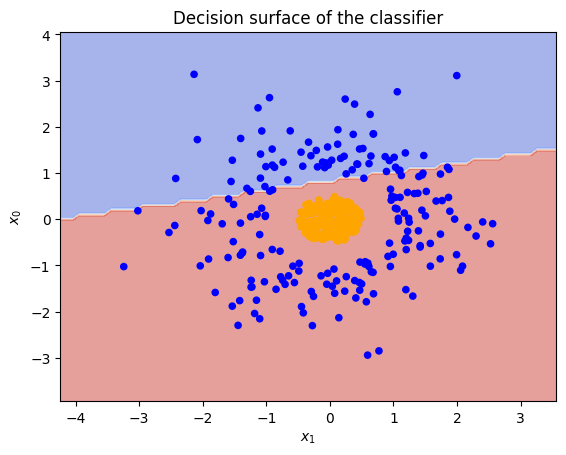

In [44]:
# Plot the decision surface of the SVM using the utils.lib.plot_decision_surface
plot_decision_surface(X_test, y_test, clf)

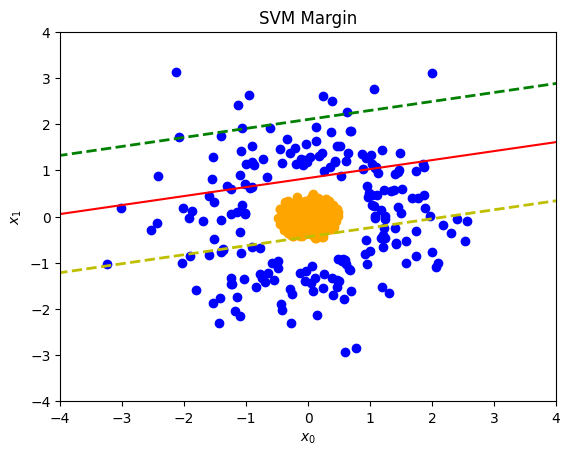

In [45]:
# Plot the margin of the SVM using the utils.lib.plot_svm_margin
plot_svm_margin(X_test, y_test, clf)

Clearly, the decision function is linear, while the data presents a non-linearity. Therefore, we need to employ a different kind of kernel to capture this feature. 

## Feature mapping
Non-linearly separable problems need a higher expressive power. We employ a homogeneus feature mapping $\phi: \mathcal{X} \rightarrow \mathcal{H}$ which maps each example $\mathbf{x} \in \mathcal{X}$ in a higher-dimensional space $\mathcal{H}$. The examples must be (approximately) linearly separable in the mapped space.

$$
    \phi : \mathbf{R}^2 \rightarrow \mathbf{R}^3\\
    \quad \mathbf{x} = \binom{x_0}{x_1} \; \mapsto \; \phi(\mathbf{x}) = \left(\begin{gather}
    x_0^2 \\
    x_0 \cdot x_1 \\
    x_1^2
  \end{gather}\right)
$$

In [46]:
# Define a function which converts a 2D example in its 3D mapping
# Create a new variable called X3d which contains the mapped dataset
import numpy as np

def feature_map(X):
    x0, x1 = X
    return [x0**2, x0*x1, x1**2]

X3d = np.array([feature_map(e) for e in X])

In [47]:
# Perform the train/test split and save the new dataset
X3d_train, X3d_test, y3d_train, y3d_test = train_test_split(X3d, Y, test_size=0.2, random_state=42)

### SVM with Linear Kernel (Feature Mapping)

In [48]:
# Train a linear SVM and perform inference with the mapped data
clf = SVC(kernel='linear')
clf.fit(X3d_train, y3d_train)

y3d_pred = clf.predict(X3d_test)

In [49]:
# Compute the accuracy
accuracy_score(y3d_test, y3d_pred)

1.0

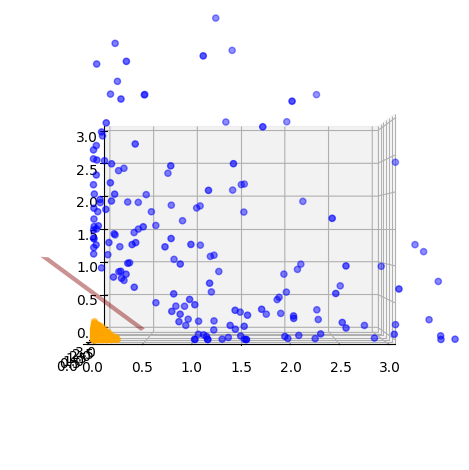

In [50]:
# Print the 3D decision surface of the SVM using utils.lib.plot_3D_decision_surface
plot_3D_decision_surface(X3d_test, y3d_test, clf)

## SVM with Polynomial Kernel

Devising a feature mapping $\phi$ is a nice idea. However, it can be time-consuming and expensive to compute if we are dealing with a high-dimensional polynomial mapping. We can use the **kernel trick** to avoid computing explicity the mapping.

$$
k(\mathbf{x}, \mathbf{x'}) = \phi(\mathbf{x})^\top \phi(\mathbf{x}') \qquad \phi: \mathcal{X} \rightarrow \mathcal{H} \quad \mathbf{x} \in \mathbb{X}
$$

If we use a kernel, then we work directly on the _input space_ rathen than a different mapping.

In [51]:
# Train an SVM by using a (homogeneous) polynomial kernel of degree 2
clf = SVC(kernel='poly',degree=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [52]:
# Compute the accuracy
accuracy_score(y_test, y_pred)

1.0

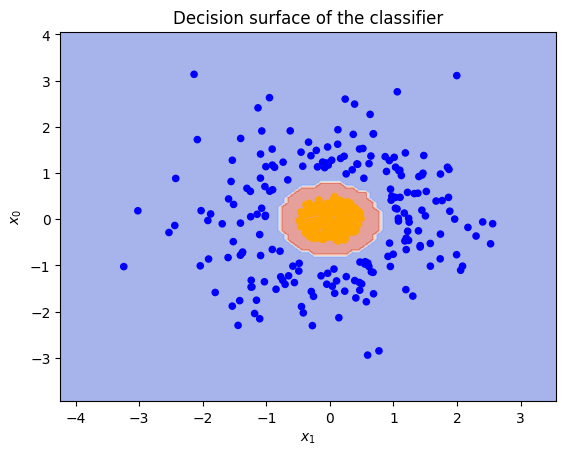

In [53]:
# Plot the decision surface of the SVM using utils.lib.plot_decision_surface
plot_decision_surface(X_test, y_test, clf)

## Decision Tree 

In [54]:
# Perform the train/test split and save the new dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
# Create a decision tree classifier and train it over the data
# Perform inference over the test set
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [56]:
# Compute the accuracy
accuracy_score(y_test, y_pred)

0.9925

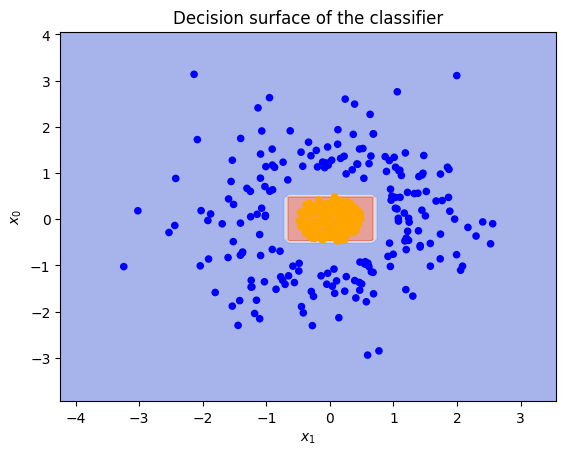

In [57]:
# Plot the decision surface
plot_decision_surface(X_test, y_test, clf)

Decision Trees are models which we can consider interpretable. It means that we can "look into" the model itself and understand how the decision function. In the case of decision trees, sklearn provides us with a nice utility to plot a trained tree to understanding the splitting rules. 

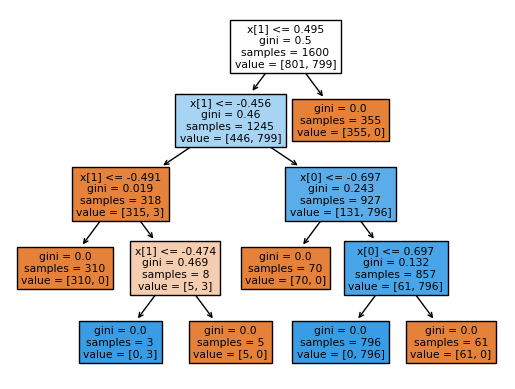

In [58]:
# Plot an interpretable version of the trained decision tree
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(clf, filled=True)
plt.show()

## Random Forest

Test accuracy: 1.0


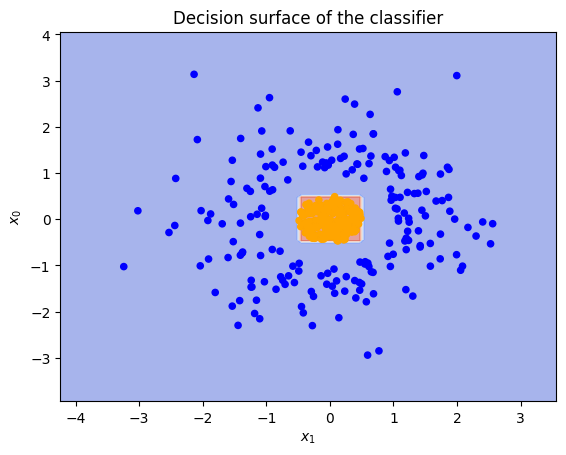

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Compute the accuracy
print('Test accuracy:', accuracy_score(y_test, y_pred))

# Plot the decision surface
plot_decision_surface(X_test, y_test, clf)

# K-fold Cross Validation

In real word, we do not have a separate test set we can evaluate on. We need a way to evaluate our model and obtain a reasonable estimate about its predictive quality once sent to production.

Suppose we have a dataset such as this one:
<br><br>
<img src="./img/kfold/1.png" style="width: 400px;"/>
<br><br>
<br><br>
<img src="./img/kfold/2.png" style="width: 400px;"/>
<br><br>

Generally, we use the train set to train our model. Then, we evaluate on the test set. However, in real life, we do not have a test set which is representative of the real distribution the model will have to work on once deployed.

<br><br>
<img src="img/kfold/3.png" style="width: 400px;"/>
<br><br>

What can we do? We could split again the train set and obtain a **validation set** we could use for the evaluation. Basically, we forget that the test dataset exists and we use it only at the end.  

<br><br>
<img src="img/kfold/4.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/5.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/6.png" style="width: 400px;"/>
<br><br>

However, why should we limit ourselves to a single validation dataset? We can take "multiple" validation datasets and compute an average of the performance of our model. 

<br><br>
<img src="img/kfold/7.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/8.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/9.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/10.png" style="width: 400px;"/>
<br><br>


In [60]:
# Perform 5-fold cross-validation on an SVM classifier.
# Use as scoring metric the F1
# Save the F1 values for each split into a list
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_train, X_test_secret, y_train, y_test_secret = train_test_split(X, Y, test_size=0.2, random_state=42)

clf = SVC(kernel="linear", class_weight="balanced")

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=kf.split(X_train, y_train), scoring="accuracy")

In [61]:
# Print the k-fold scores and their mean
print("K-Fold Accuracy-Scores: ", scores)
print(f"Mean F1-Scores {np.mean(scores):.2f}+/-{np.std(scores):.2f}")

K-Fold Accuracy-Scores:  [0.671875 0.640625 0.665625 0.659375 0.65625 ]
Mean F1-Scores 0.66+/-0.01


In [62]:
# Train an SVM model using the entire training dataset.
clf = SVC(kernel="linear", class_weight="balanced")
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test_secret)

In [64]:
# Compute the final F1 score
from sklearn.metrics import f1_score
print(f1_score(y_pred,y_test_secret))

0.7458256029684601


### To be remembered

Source: Learning from data, Yaser S. Abu-Mostafa (2012) - Chapter 4.

<br><br>
<img src="img/validation.png" style="width: 800px;"/>
<br><br>

# 🗂 Know your data

Data are the quintessence of Machine Learning: **no data**, **no learning**. But this also extends to: **no good data**, **no good models**. There are several problems that you may encounter in a real-world machine learning problem:
1. Data are scarce (e.g., few data collected as to lower the overall gathering cost)
2. Data comes in different modalities (e.g., may include multimodal information, like product provenience, serial number, specifices _etc._ or even incompatible formats)
3. Data are incomplete or unlabelled (e.g., some entries are missing)

**Possible solutions**:
1. Ligther models, assert more assumptons (_implicit biases_), design interactive pipelines for collecting more data
2. Be sure of what modality is mostly informative for the task at hand, leverage different information channels, uniform data format
3. Discard the incomplete entries, use flexible models (semi-supervised), or augment with strategies of auto-filling

## Visualization (is for you 🫵)

Make sure of using all available resources to get as much information as possible from data. **The more you know about the data, the easier to find a solution**!

Let's take a look about a dataset we do not know using **pandas**. 

In [65]:
# load a dataset about wines (?)

import pandas as pd

# we load a dataframe with pandas
df_wine = pd.read_csv("data/winequality-red.csv",sep=';')

# visualization of first entries
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [67]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Let's do some plotting to know how the data columns are distributed in the dataset

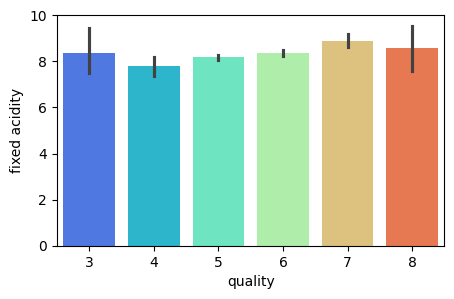

In [68]:
# we use matplotlib and seaborn to plot our results

import matplotlib.pyplot as plt
import seaborn as sns

#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (5,3))
_ = sns.barplot(x = 'quality', y = 'fixed acidity', data = df_wine, palette='rainbow')

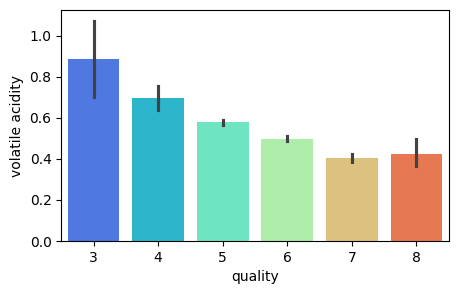

In [69]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (5,3))
_ = sns.barplot(x = 'quality', y = 'volatile acidity', data = df_wine, palette='rainbow')

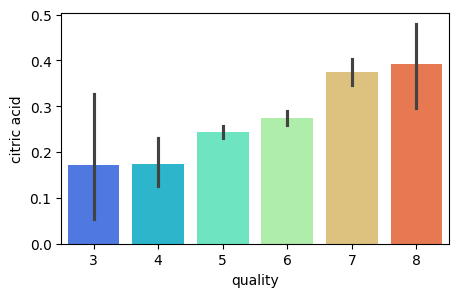

In [70]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (5,3))
_ = sns.barplot(x = 'quality', y = 'citric acid', data = df_wine, palette='rainbow')

### Now we preprocess the dataset

In [71]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_wine['quality'] = pd.cut(df_wine['quality'], bins = bins, labels = group_names)

In [72]:
from sklearn.preprocessing import LabelEncoder

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [73]:
#Bad becomes 0 and good becomes 1 
df_wine['quality'] = label_quality.fit_transform(df_wine['quality'])

df_wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [74]:
#Now seperate the dataset as response variable and feature variabes
X = df_wine.drop('quality', axis = 1)
y = df_wine['quality']

In [75]:
#Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [76]:
from sklearn.preprocessing import StandardScaler
#Applying Standard scaling to get optimized result
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### And after that, it is only a matter of cooking the model with the right recipe 🍳

## Standard Machine Learning Workflow

1. Analyze your dataset and the task (e.g., understand data distribution, check for missing values, etc.)
1. Preprocess your dataset (e.g., input missing values, standardize, etc.)
1. Choose a suitable model (e.g., decision tree, SVM, neural network, etc.)
1. Train your model (hyperparameter tuning)
1. Evaluate your model 

In [77]:
# CHOOSE YOUR MODEL

clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [78]:
y_test.value_counts()

quality
0    273
1     47
Name: count, dtype: int64

In [79]:
# Computer the accuracy
accuracy_score(y_test, y_pred)

0.853125

Great! The accuracy of our model is very high. It is more or less what we want. However, how do we know that our model is doing well? Visual inspection is not possible anymore, since we have a higher dimensional problem. Therefore, we need to resort to additional metrics with a higher "explanatory" power.

$F_1$ is defined as the harmonic mean of the precision and recall. It is a metric which measures the test's accuracy.

$$
    \begin{gather}
    F_1 = 2 \cdot \dfrac{(precision \cdot recall)}{(precision + recall)} \\[1.5em]
    precision = \frac{TP}{TP+FP} \qquad recall = \frac{TP}{TP+FN}
    \end{gather}
$$

In [80]:
# Compute the F1 score
from sklearn.metrics import f1_score
print("F1 Score: ", f1_score(y_pred,y_test))

F1 Score:  0.0


The $F_1$ score is really bad. Let us check more in detail what is happening with our model.

In [81]:
# Compute the precision and recall 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



This report is kind of useful, but the **confusion matrix** can give us a better picture

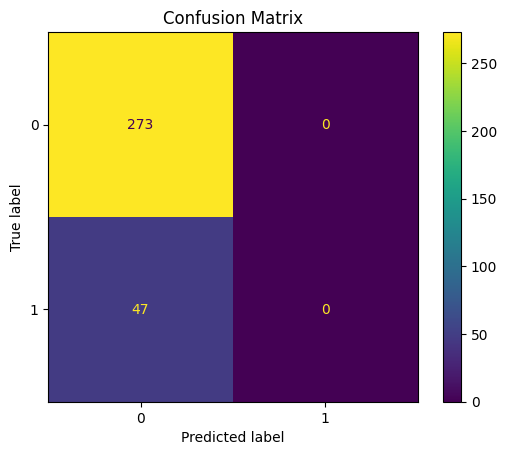

In [82]:
# Plot the confusion matrix of the classifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()# cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

As we can see, the model is able to predict correctly all the instances of class $0$. However, it is very bad in classifying instances of the class $1$. 

In [83]:
# Print the class predicted by the model on the test set
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [84]:
# Compute the target class distribution in the train dataset (y_train)
y_train.value_counts()

quality
0    1109
1     170
Name: count, dtype: int64

Recall the standard formulation of a soft-margin SVM. The regularization parameter $C$ trade-offs the data fitting with the size of the margin. In the standard case, $C$ is the same for all the classes, which means that the misclassification penalty is the same for every class.
$$
\min_{\mathbb{w}, w_0, \zeta} = ||\mathbf{w}||^2 + C \sum_{i=0}^N \zeta_i
$$

In our case, since we are dealing with an unbalanced dataset, we want to give a higher penalty if we misclassify an example coming from the minority class. Therefore, the formulation becomes:

$$
\min_{\mathbb{w}, w_0, \zeta} = ||\mathbf{w}||^2 + \sum_{i=0}^N \zeta_i \cdot (\mathbb{I}[y_i = 1]C_{1}+\mathbb{I}[y_i = 0]C_{0})
$$

where $C_{0}$ and $C_{1}$ indicates the penalties associated to the two classes. $\mathbb{I}$ is the indicator function.


In [85]:
# Train a balanced SVM and perform inference over the test set
from sklearn.svm import SVC

# The parameter "balanced" enable us to re-weight each class penalties by looking
# at their numerosity in the training set.
clf = SVC(kernel="linear", class_weight = "balanced")

# Training
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

In [86]:
# Compute the F1 score
from sklearn.metrics import f1_score
print("F1 Score: ", f1_score(y_pred,y_test))

F1 Score:  0.5753424657534246


In [87]:
# Compute the precision and recall 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       273
           1       0.42      0.89      0.58        47

    accuracy                           0.81       320
   macro avg       0.70      0.84      0.72       320
weighted avg       0.90      0.81      0.83       320



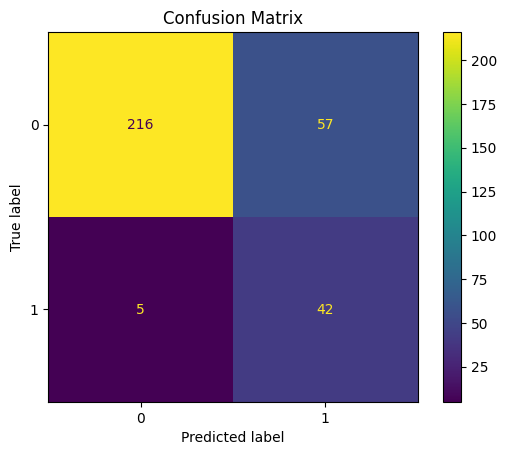

In [88]:
# Plot the confusion matrix of the classifier
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()# cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [89]:
### Try to improve w.r.t. present method, e.g. Random Forest, SVC with non-linear kernel?
### Make use also of CROSS-VALIDATION!

clf = #your model here
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

# Plot the confusion matrix of the classifier
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()# cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

SyntaxError: invalid syntax (3292008664.py, line 4)

In [90]:
### Try to improve w.r.t. present method, e.g. Random Forest, SVC with non-linear kernel?
### Make use also of CROSS-VALIDATION!

from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

clf = RandomForestClassifier(random_state=0, class_weight='balanced')
param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}

sh = HalvingGridSearchCV(clf, param_grid, cv=5,
                          factor=2, resource='n_estimators',
                          max_resources=30).fit(X_train, y_train)
sh.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=24,
                       random_state=0)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.69      0.43      0.53        47

    accuracy                           0.89       320
   macro avg       0.80      0.70      0.73       320
weighted avg       0.88      0.89      0.88       320

F1-score: 0.5263157894736842


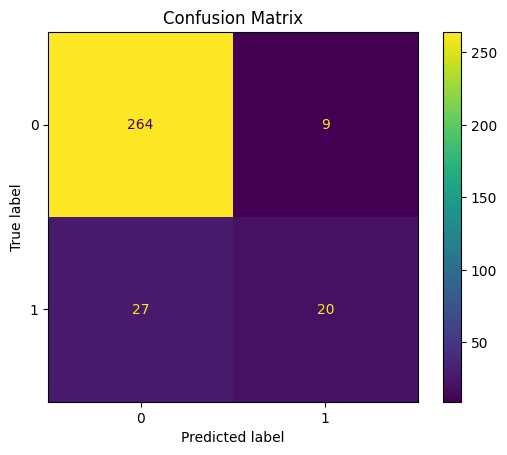

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=10, n_estimators=24, class_weight='balanced',
                             random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

# Plot the confusion matrix of the classifier
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()# cmap='Blues')
plt.title("Confusion Matrix")
plt.show()